<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/3_4_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C%2C_%ED%8A%B9%EC%84%B1_%EC%B6%95%EC%A4%84_%EB%A7%A4%EB%8B%88%ED%8F%B4%EB%93%9C_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs

from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer


import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(12,8)})

from pandas.core.common import random_state

# 3.4  차원축소, 특성 축줄 매니폴드 학습
비지도 학습을 사용해 데이터를 변환하는 이유는 여러가지이다. 가장 일반적인 동기는 시각화하거나, 데이터를 압축하거나, 추가적인 처리를 위해 정보가 더 잘 드러나는 표현을 찾기 위해서이다.
 
 이번 절에서는 이런 용도로 가장 간단하고 흔히 사용하는 알고리즘인 주성분 분석 PCA를 소개한다.  그리고 특성 추출에 널리 사용하는 비음수 행렬 분해와 2차원 산점도를 이용해 시각화 용도로 많이 사용하는 t-SNE 알고리즘도 살펴보자.

\
### 3.4.1 주성분 분석 PCA

주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전하는 기술이다. 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택된다. 다음 예제는 인위적으로 만든 2차원 데이터셋을 사용하여 PAC 효과를 나타낸 것이다.

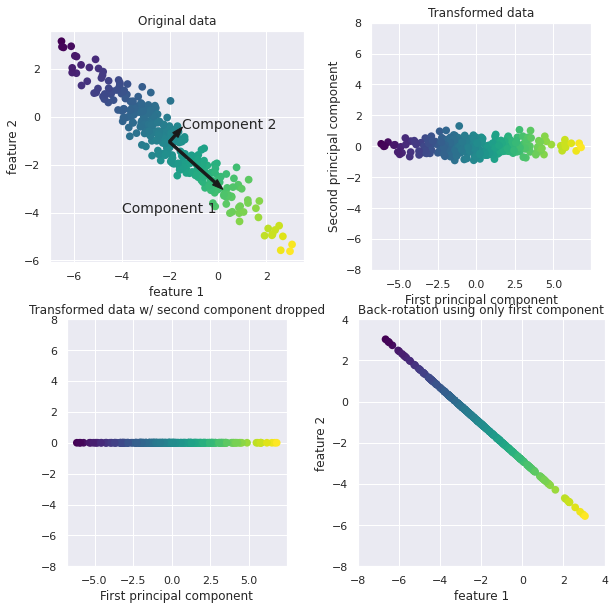

In [9]:
mglearn.plots.plot_pca_illustration()

**첫 번째 그래프**는 (왼쪽 위) 원본 데이터 포인트를 색으로 구분해 표시한 것이다. 이 알고리즘은 먼저'성분 1'이라고 쓰여 있는, 분산이 가장 큰 방향을 찾는다. 이 방향(또는 벡터)이 데이터에서 가장 많은 정보를 담고 있는 방향이다. 다른 말로, 특성들의 상관관계가 가장 큰 방향이다. 그다름으로, 이 알고리즘은 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾는다. 2차원에서는 가능한 직각 방향이 하나뿐이지만 고차원에서는 (무한히) 많은 직각 방향이 있을 수 있다. 두 성분을 화살표로 나타냈지만, 사실 화살표의 머리와 꼬리는 아무 의미가 없다. 즉 화살표를 중앙에서 오른 쪽 아래로 향하게 그리지 않고 왼쪽 위로 향하게 그릴 수도 있다. 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 주성분(*principal component*) 이라고 한다. 일반적으로 원본 특성 개수만큼의 주성분이 있다.

\
**두번째 그래프**는(오른쪽 위) 같은 데이터이지만 주성분 1과 2를 각각 x 축과 y축에 나란하도록 회전한 것이다. 회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 맞췄다. PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행열(*correlation matrix*)이 대각선 방향을 제회하고는 0 이 된다.

\
PAC는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있다. 이 예에서 **세 번째 그래프**(왼쪽 아래) 처럼 첫 번째 주성분만 유지하려고 한다. 이렇게 하면 2차원 데이터셋이 1차원 데이터셋으로 차원이 감소한다. 그러나 단수히 원본 특성 중 하나만 남기는 것은 아니다. 가장 중요한 방향을 찾아서 그 방향의 성분, 측 첫 번째 주성분을 유지하는 것이다

\
마지막으로 데이터에 다시 평균을 더하고 반대로 회전시킨다. 이 결과가 **마지막 그래프**이다. 이 데이터 포인트들은 원래 특성 공간에 놓여 있지만 첫 번째 주성분의 정보만 담고 있다. 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화 하는 데 종종 사용된다.


### PCA를 적용해 유방암 데이터셋 시각화하기

PCA가 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화이다. 1장에서 본 것처럼 세 개 이상의 특성을 가진 데이터를 산점도로 표현하기란 쉽지 않다. iris 데이터셋의 경우 두 개씩 짝지은 특성들의 관계를 산점도 행렬로 그릴 수 있다. 하지만, 유방암 데이터셋에는 산섬도 행렬도 어렵다. 이 데이터셋은 특성을 30개나 가지고 있어서(산점도 행렬의 우삼각형 부분만 하더라도) 30 * 14.5 = 435개의 산점도를 그려야 한다(조합의 수). 이렇게 많은 그래프는 이해하기는 커녕 자세히 들여다볼 수도 없다.
이보다 쉬운 방법은 양성과 악성 두 클래스에 대해 각 특성의 히스토 그램을 그리는 것이다.



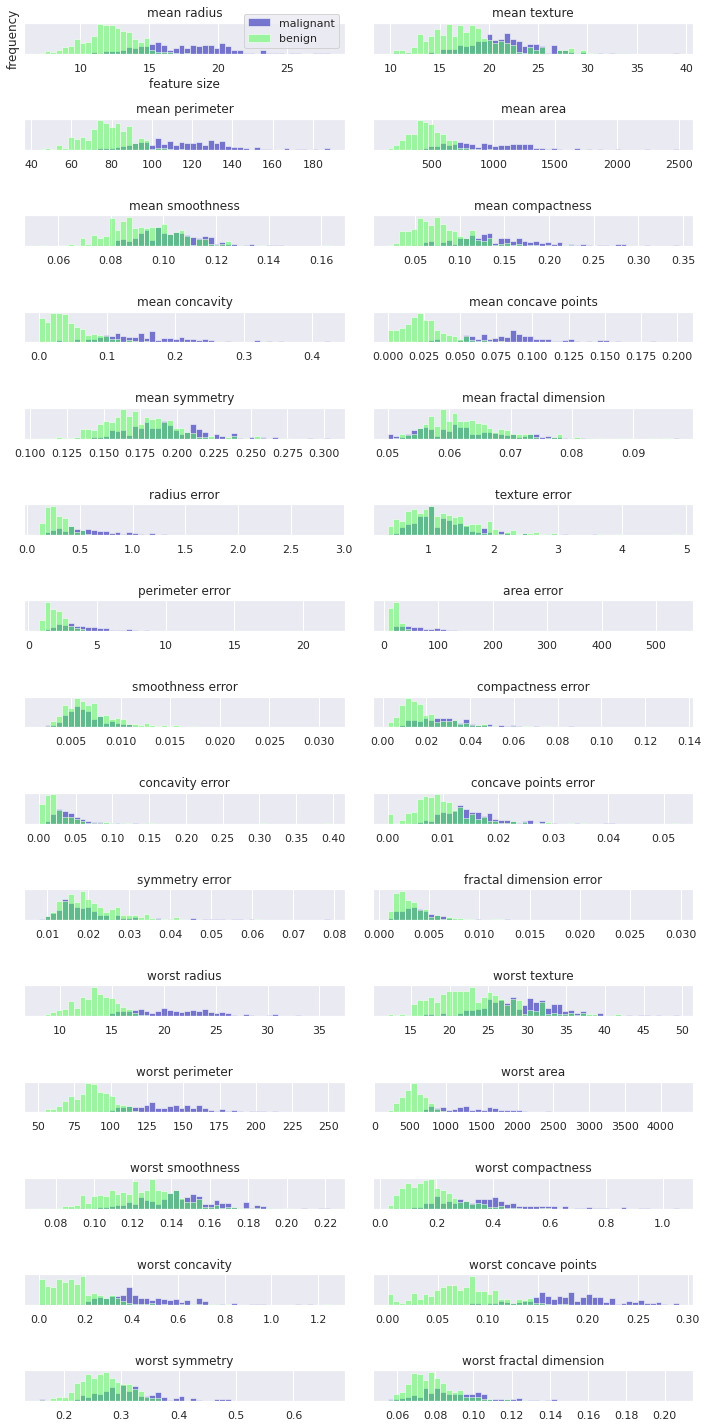

In [10]:
cancer = load_breast_cancer()

fig, axes = plt.subplots(15,2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0] # 악성
benign = cancer.data[cancer.target == 1]     # 양성

ax = axes.ravel()

for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
  ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
ax[0].set_xlabel('feature size')
ax[0].set_ylabel('frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()


그림은 각 특성에 대한 히스토그램으로 특정 간격(bin)에 얼마나 많은 데이터포인트가 나타나는지 횟수를 센 것이다. 각 그래프는 히스토그램 두 개를 겹쳐놓은 것으로 초록색은 양성 클래스의 포인트를, 그리고 푸른색은 악성 클래스의 포인트를 나타낸다. 이 그름은 특성들이 클래스별로 어떻게 분포되어 있는지를 알려주고, 이를 통해 어떤 특성이 양성과 악성 샘프을 구분하는 데 더 좋은 지 가능해볼 수 있다. 예를 들어 "smoothness error" 특성은 두 히스토그램이 거의 겹쳐져 별로 쓸모가 없다. 하지만 "worst concave points"는 두 히스토그램이 확실히 구분되어 매우 유용한 특성이다.

\
그러나 이 그래프는 특성간 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주지 못한다. PCA를 사용하면 주요 상호작용을 찾아낼 수 있어 더 나은 그림을 만들수 있다. 처음 두 개의 주성분을 찾아 2차원 공간에 하나의 산점도로 데이터를 시가화해겠다.

\
PCA를 적용하기 전 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 데이터의 스케일을 조정한다.

In [11]:
scaler = StandardScaler() 
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [12]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킨다.
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만든다.
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환한다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, 'principal component 2')

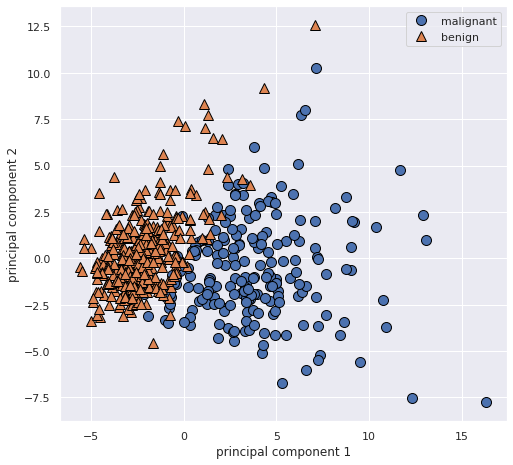

In [13]:
# 맨 처음 두 개의 주성분을 그린다.

# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타낸다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['malignant', 'benign'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

PCA는 비지도 학습이므로 회전축을 찾을 때 어떤 클래스 정보도 사용하지 않는다. 단순히 데이터에 있는 상관관계만을 고려한다. 이 산점도는 첫 번째 주성분과 두 번째 주성분을 사용하여 만들었고 클래스 정보를 이용하여 포인트의 모양을 구분하였다. 두 클래스가 2차원 공간에서 꽤 잘 구분되는 것을 볼 수 있다. 이런 그림이라면 (2차원 공간에서 직선 하나를 학습하는) 선형 분류기로도 두 클래스를 잘 구분할 수 있을 것 같다. 또 학성 포인트가 양성 포인트 보다 널게 퍼져있는 것을 볼 수 있으며 이는 이전 히스토그램에서도 살짝 엿볼 수 있다.

\
PCA의  단점은 그래프의 두 축으 해석하기가 쉽지 않다는 점이다. 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이다. 잠시 후에 보겠지만, 이런 조합이 보통 매우 복잡하다. PCA 객체가 학습될 때, components_ 주성분이 저장된다.

In [14]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


components_ 의 각 행은 주성분 하나씩을 나타내며 중요도에 따라 정렬되어 있다. (맨처음 주성분이 가장 위애 나타난다) 열은 원본 데이터의 특성에 대응하는 값이다. 이 예에서는 'mean radius', 'mean texture' 등이다. components 값을 출력해 보자.

In [15]:
print("PCA 주성분:", pca.components_)

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'principal component')

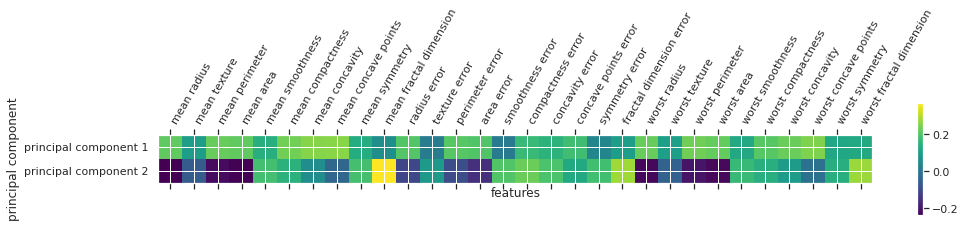

In [16]:
# 이 값을 히트맵으로 시각화 하면 이해하기 더 쉬울 수 있다.
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["principal component 1", "principal component 2"])

plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("features")
plt.ylabel("principal component")

첫 번째 주성분의 모든 특성은 부호가 같다(모두 양수지만, 앞서 언급한 대로 주성분의 화살표 방향은 의미 없다) 이 말은 모든 특성 사시에 공통의 상호관계가 있다는 뜻이다. 따라서 한 특성의 값이 커지면 다른 값들도 같이 높아질 것이다. 두 번째 주성분은 부호가 섞여 있고 두 주성분 모두 30개의 특성이 있다. 모든 특성이 섞여 있기 때문에 훅이 가지는 의미를 설명하기가 쉽지 않다.


\
### 고유얼굴 특성 추출
PCA는 특성 추출에도 이용한다. 특성 추출은 원본 데이터 표현보다 분석하기에 더 적합한 표현을 찾을 수 있으리란 생각에서 출발한다. 이미지를 다루는 애플리케이션은 특성 추출이 도움이 될만한 좋은 사례이다. 이미지는 적색, 녹색, 청색(RGB)의 강도가 기록된 픽셀로 구성된다. 보통 이미지 안의 물체는 수천 개의 픽셀로 이뤄지며 함께 모여 있을 대 의미가 있다.

PCA를 이용하여 LFW 데이터셋의 얼굴 이미지에서 특성을 추출하는 아주 간단한 애플리케이션을 만들어 보자. 이 데이터셋은 인터넷에서 내려받은 유명 인사드릐 얼굴 이미지들로 2000년 초반 이후 정치인, 가수, 배우, 운동선수들의 얼국을 포함한다. 이번 예제에서는 처리 속도를 높이고자 흑백 이미지를 사용하고 스케일을 줄였다. 다음은 그중 몇개의 샘플을 보여준다.


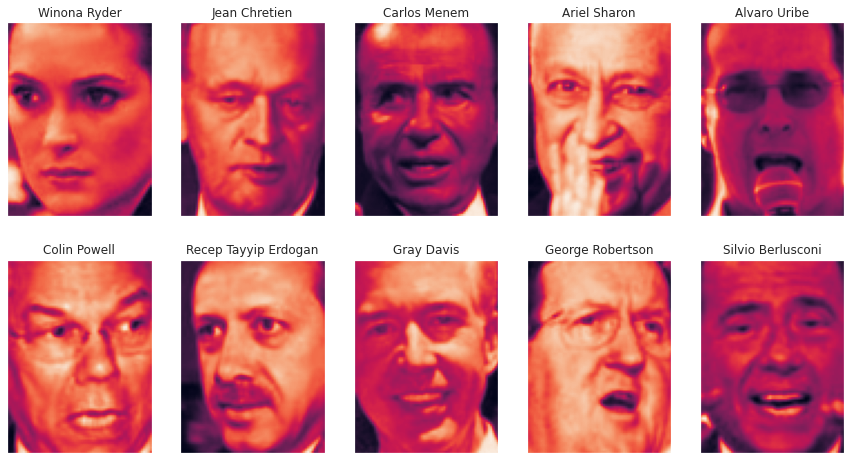

In [18]:
from IPython.core.pylabtools import figsize
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])


In [20]:
# LFW 데이터셋에는 62명의 얼굴을 찍은 이미지가 총 3,023개가 있으며 각 이미지의 크기는 87x65 픽셀이다.

print("people.images.shape:", people.images.shape)
print("people target names:", len(people.target_names))

people.images.shape: (3023, 87, 65)
people target names: 62


그런데 이 데이터셋은 조금 편중되어서, 다음에서 볼수 있듯이 조지 부시와 콜린 파월의 이미지가 많다.

In [23]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 회숫 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25} {1:3}".format(name, count), end='   ')
  if (i + 1) % 3 == 0:
    print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

데이터셋의 편중을 없애기 위해 사람마다 50개의 이미지만 선택하자.
(그렇게 하지 않는다면, 조지 부시 이미지에 치우친 특성이 추출된다.)

In [24]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# 0 ~ 255 사이에 흑백 이미지의 픽셀 값을 0~1 스케일로 조정한다.
# MinMaxScaler를 적용하는 것과 거의 같다.
X_people = X_people / 255

얼굴 인식이라 하면 통상적으로 새로운 얼국 이미지가 데이터베이스에 있는 시존 얼국 중 하나에 속하는지 찾는 작업이다. 사진 애플리케이션, 소셜 미디어, 보안 애플리케이션들이 이에 속한다. 해결 방법 중 하나는 각 사람을 서로 다른 클래스로 구분하는 분류기를 만드는 것이다. 하지만 보통 얼굴 데이터베이스에는 사람의 수는 많지만 각 사람에 대한 이미지는 적다(즉 클래스별 훈련 데이터가 너무 적다). 이런 문제 때문에 대부분의 분류기를 훈련 시키키 어렵다. 그리고 대규모 모델을 다시 훈련시키지 않고도 새로운 사람의 얼굴을 쉽게 추가할 수도 있어야 한다.

간단한 방법으로, 분류하려는 얼국과 가장 비슷한 얼국 이미지를 찾는 1-최근접 이웃 분류기를 사용할 수 있다. 이 분류기는 원칙적으로 클래스마다 하나의 훈련 샘플을 사용한다. KNeighborsClassifier가 얼마나 잘 적용되는지 보자.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈려 세트와 테스트 세트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# 이웃 개수를 한 개로 하여 KNeighborsClassifier 모델을 만든다.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test,y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


정확도가 23% 이다. 클래스 62개를 분류하는 문제에서 아주 나쁜 결과는 아니지만(무작위로 분류하는 경우 정확도는 1.6%), 그렇다고 좋은 결과라고 할 수 없다. 네번에 한 번 꼴로만 올바르게 인식하기 때문이다.

그래서 PCA가 필요하다.얼굴의 유사도를 측정하기 위해 원본 픽셀 공간에 거리를 계산하는 것은 매우 나쁜 방법이다. 픽셀을 사용해서 두 이미지를 비교할 때, 각 픽셀의 회색톤 값을 다른 이미지에서 동일한 위치에 있는 픽셀 값과 비교한다. 이런 방식은 사람이 얼국 이미지를 인식하는 것과 많이 다르고, 픽셀을 있는 그래도 비교하는 방식으로는 얼국의 특징을 잡아내기가 어렵다. 예를 들어 픽셀을 비교할 때 얼국 위치가 한 픽셀만 오른쪽으로 이동해도 큰 차이를 만들어 완전히 다른 얼굴로 인식하게 된다. 그래서 주성분으로 변환하여 거리를 계산하면 정확도가 높아지지 않을까 기대해본다. 여기서는 PCA의 화이트닝 옵션을 사용해서 주성분의 스케일이 같아지도록 조정한다. 이는 화이트닝 옵션 없이 변환한 후에 StandardScaler를 적용하는 것과 같다. 

맨 위의 데이터를 다시 이용해서 화이트닝 옵션으로 데이터가 회전하는 것뿐만 아니라 스케일도 조정되어 그래프가 (타원이 아닌) 원모양이로 바뀌었다.

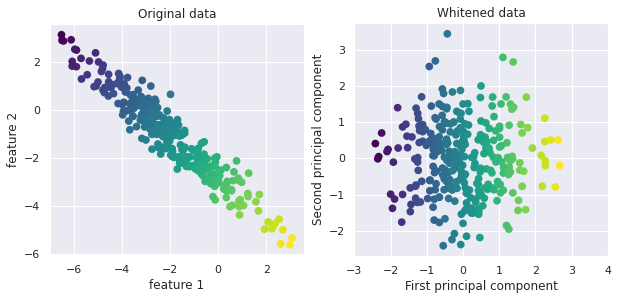

In [27]:
mglearn.plots.plot_pca_whitening()